<a href="https://colab.research.google.com/github/srivastavask/cvlab-ai/blob/main/lab5/B40_E22CSEU1183_SANCHIT/LAB_1/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

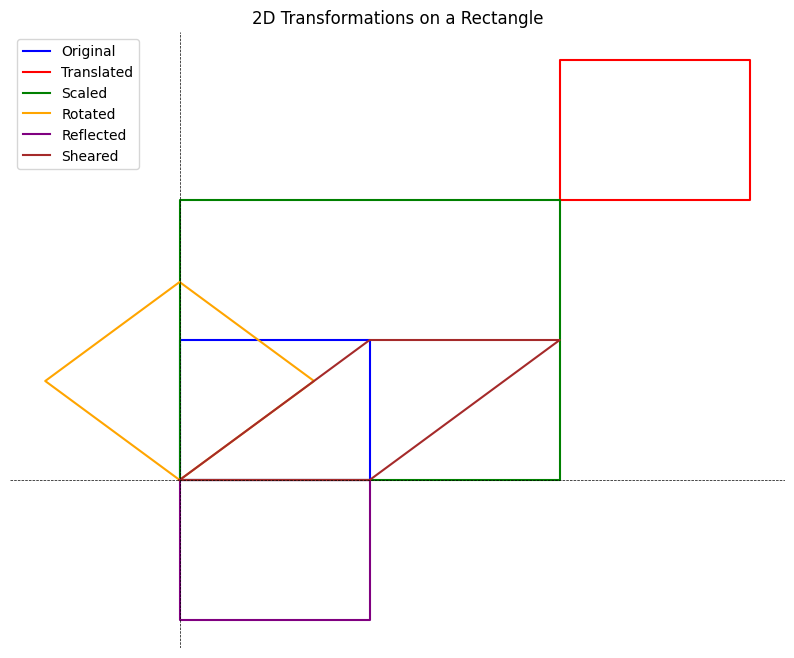

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to plot a 2D object
def plot_object(points, color, label):
    x = np.append(points[:, 0], points[0, 0])  # Closing the shape
    y = np.append(points[:, 1], points[0, 1])
    plt.plot(x, y, color=color, label=label)

# Define the rectangle
rectangle = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])  # Rectangle vertices

# Transformation functions
def translate(points, tx, ty):
    translation_matrix = np.array([[1, 0, tx],
                                    [0, 1, ty],
                                    [0, 0, 1]])
    points_h = np.hstack((points, np.ones((points.shape[0], 1))))
    return (translation_matrix @ points_h.T).T[:, :2]

def scale(points, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0],
                                [0, sy, 0],
                                [0, 0, 1]])
    points_h = np.hstack((points, np.ones((points.shape[0], 1))))
    return (scaling_matrix @ points_h.T).T[:, :2]

def rotate(points, angle):
    rad = np.radians(angle)
    rotation_matrix = np.array([[np.cos(rad), -np.sin(rad), 0],
                                 [np.sin(rad), np.cos(rad), 0],
                                 [0, 0, 1]])
    points_h = np.hstack((points, np.ones((points.shape[0], 1))))
    return (rotation_matrix @ points_h.T).T[:, :2]

def reflect(points, axis):
    if axis == 'x':
        reflection_matrix = np.array([[1, 0, 0],
                                       [0, -1, 0],
                                       [0, 0, 1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0, 0],
                                       [0, 1, 0],
                                       [0, 0, 1]])
    points_h = np.hstack((points, np.ones((points.shape[0], 1))))
    return (reflection_matrix @ points_h.T).T[:, :2]

def shear(points, shx, shy):
    shearing_matrix = np.array([[1, shx, 0],
                                 [shy, 1, 0],
                                 [0, 0, 1]])
    points_h = np.hstack((points, np.ones((points.shape[0], 1))))
    return (shearing_matrix @ points_h.T).T[:, :2]

# Plot original and transformed objects
plt.figure(figsize=(10, 8))
plot_object(rectangle, 'blue', 'Original')

translated = translate(rectangle, 2, 2)
plot_object(translated, 'red', 'Translated')

scaled = scale(rectangle, 2, 2)
plot_object(scaled, 'green', 'Scaled')

rotated = rotate(rectangle, 45)
plot_object(rotated, 'orange', 'Rotated')

reflected = reflect(rectangle, 'x')
plot_object(reflected, 'purple', 'Reflected')

sheared = shear(rectangle, 1, 0)
plot_object(sheared, 'brown', 'Sheared')

plt.title("2D Transformations on a Rectangle")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.axis('off')
plt.show()

ORIGINAL IMAGE


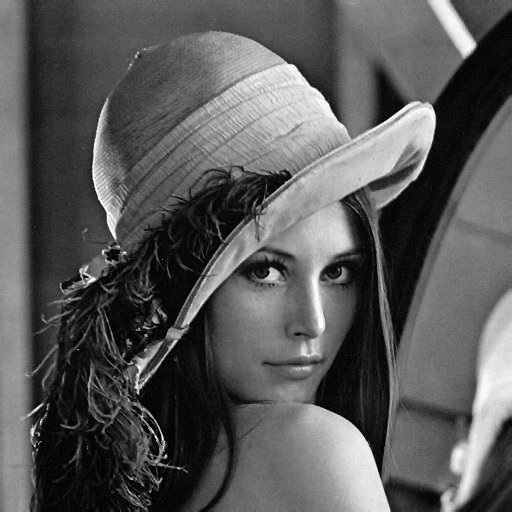



TRANSLATED IMAGE


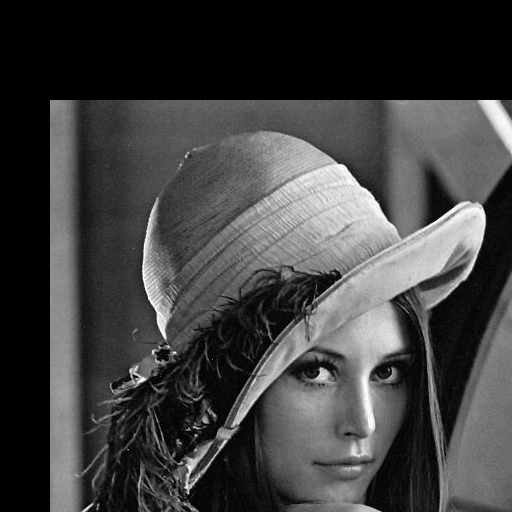



REFLECTED IMAGE


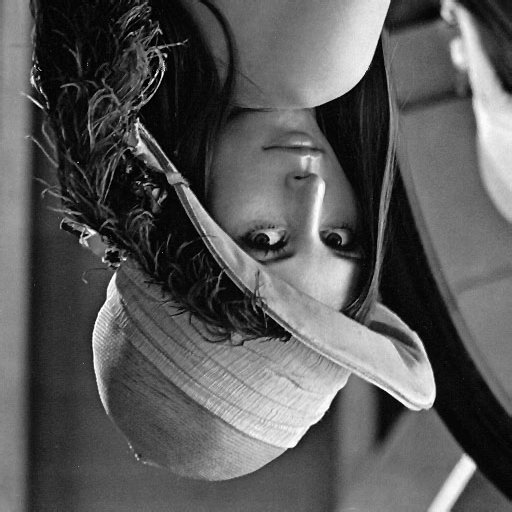



ROTATED IMAGE


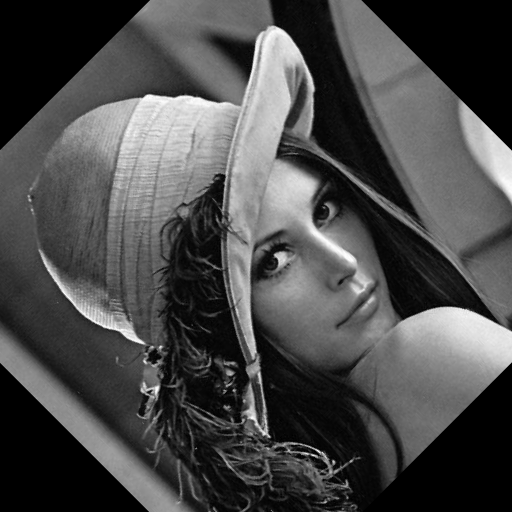



SCALED IMAGE


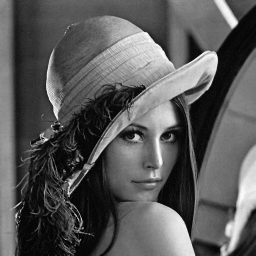



CROPPED IMAGE


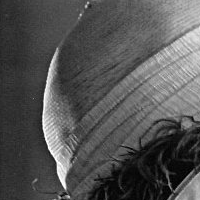



SHEARED IMAGE IN X-AXIS


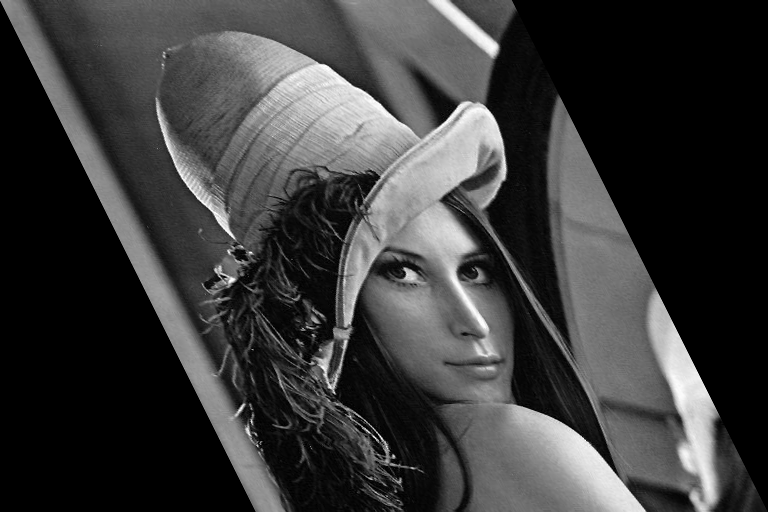



SHEARED IMAGE IN Y-AXIS


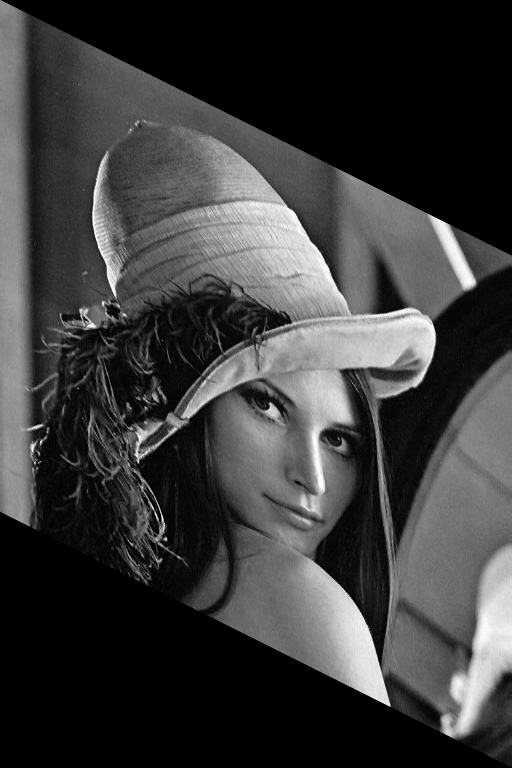

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/Lena_Image.png')  # Replace with your image path
if image is None:
    raise FileNotFoundError("Image not found. Please check the path.")

# Image Translation
def translate(img, tx, ty):
    rows, cols = img.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, translation_matrix, (cols, rows))

# Image Reflection
def reflect(img, axis):
    if axis == 'x':  # Reflect over x-axis
        return cv2.flip(img, 0)
    elif axis == 'y':  # Reflect over y-axis
        return cv2.flip(img, 1)

# Image Rotation
def rotate(img, angle):
    rows, cols = img.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    return cv2.warpAffine(img, rotation_matrix, (cols, rows))

# Image Scaling
def scale(img, fx, fy):
    return cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

# Image Cropping
def crop(img, start_x, start_y, width, height):
    return img[start_y:start_y + height, start_x:start_x + width]

# Image Shearing in X-axis
def shear_x(img, shear_factor):
    rows, cols = img.shape[:2]
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    return cv2.warpAffine(img, shear_matrix, (cols + int(shear_factor * rows), rows))

# Image Shearing in Y-axis
def shear_y(img, shear_factor):
    rows, cols = img.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    return cv2.warpAffine(img, shear_matrix, (cols, rows + int(shear_factor * cols)))

# Apply transformations
translated_img = translate(image, 50, 100)
reflected_img = reflect(image, 'x')  # Change 'x' to 'y' for y-axis reflection
rotated_img = rotate(image, 45)
scaled_img = scale(image, 0.5, 0.5)  # Scaling factors fx and fy
cropped_img = crop(image, 50, 50, 200, 200)  # Define start_x, start_y, width, and height
sheared_x_img = shear_x(image, 0.5)
sheared_y_img = shear_y(image, 0.5)

# Show results
print("ORIGINAL IMAGE")
cv2_imshow(image)
print("\n\nTRANSLATED IMAGE")
cv2_imshow(translated_img)
print("\n\nREFLECTED IMAGE")
cv2_imshow(reflected_img)
print("\n\nROTATED IMAGE")
cv2_imshow(rotated_img)
print("\n\nSCALED IMAGE")
cv2_imshow(scaled_img)
print("\n\nCROPPED IMAGE")
cv2_imshow(cropped_img)
print("\n\nSHEARED IMAGE IN X-AXIS")
cv2_imshow(sheared_x_img)
print("\n\nSHEARED IMAGE IN Y-AXIS")
cv2_imshow(sheared_y_img)